In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
### Merge the 12 months of sales data into a single CSV file

In [3]:
files = [file for file in os.listdir('./Sales_Data/')]

for i in files:
    print(i)

Sales_August_2019.csv
Sales_April_2019.csv
Sales_January_2019.csv
Sales_March_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv
Sales_February_2019.csv
Sales_December_2019.csv
Sales_June_2019.csv
Sales_July_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv


In [4]:
all_months_data = pd.DataFrame()

In [5]:
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data,df])

In [6]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [7]:
#now we want to save it
all_months_data.to_csv('./Sales_Data/all_data.csv',index=False)

In [8]:
df = pd.read_csv('./Sales_Data/all_data.csv')

In [9]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001"
186846,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301"
186847,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215"
186848,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215"


In [10]:
###cleaning the data

In [11]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [12]:
df = df.dropna(how='any')

In [13]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [14]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [15]:
#find 'Or' and delete it
condition = df['Order Date'].str[0:2] == 'Or'
temp_df = df[condition]
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
211,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
243,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1412,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1427,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185203,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185843,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186236,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186336,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [16]:
condition = df['Order Date'].str[0:2] != 'Or'
df = df[condition]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001"
186846,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301"
186847,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215"
186848,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215"


In [17]:
### augment data with additional columns

In [18]:
###Add month column
df['month'] = df['Order Date'].str[0:2]
df['month'] = df['month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


In [19]:
###question one what was the best month of sales? How much was earned that month?

In [20]:
#add sales column
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')
df['Price Each'] = df['Price Each'].astype('float32')
df['sales'] = df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,236670,Wired Headphones,2,11.990000,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.980000
1,236671,Bose SoundSport Headphones,1,99.989998,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.989998
2,236672,iPhone,1,700.000000,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.000000
3,236673,AA Batteries (4-pack),2,3.840000,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.680000
4,236674,AA Batteries (4-pack),2,3.840000,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.680000


In [21]:
top_month = pd.DataFrame(df.groupby('month')['sales'].sum().sort_values(ascending=False).reset_index())
top_month

,month,sales
0,12,4.613443e+06
1,10,3.736727e+06
2,4,3.390670e+06
3,11,3.199603e+06
4,5,3.152607e+06
5,3,2.807100e+06
6,7,2.647776e+06
7,6,2.577802e+06
8,8,2.244468e+06
9,2,2.202022e+06


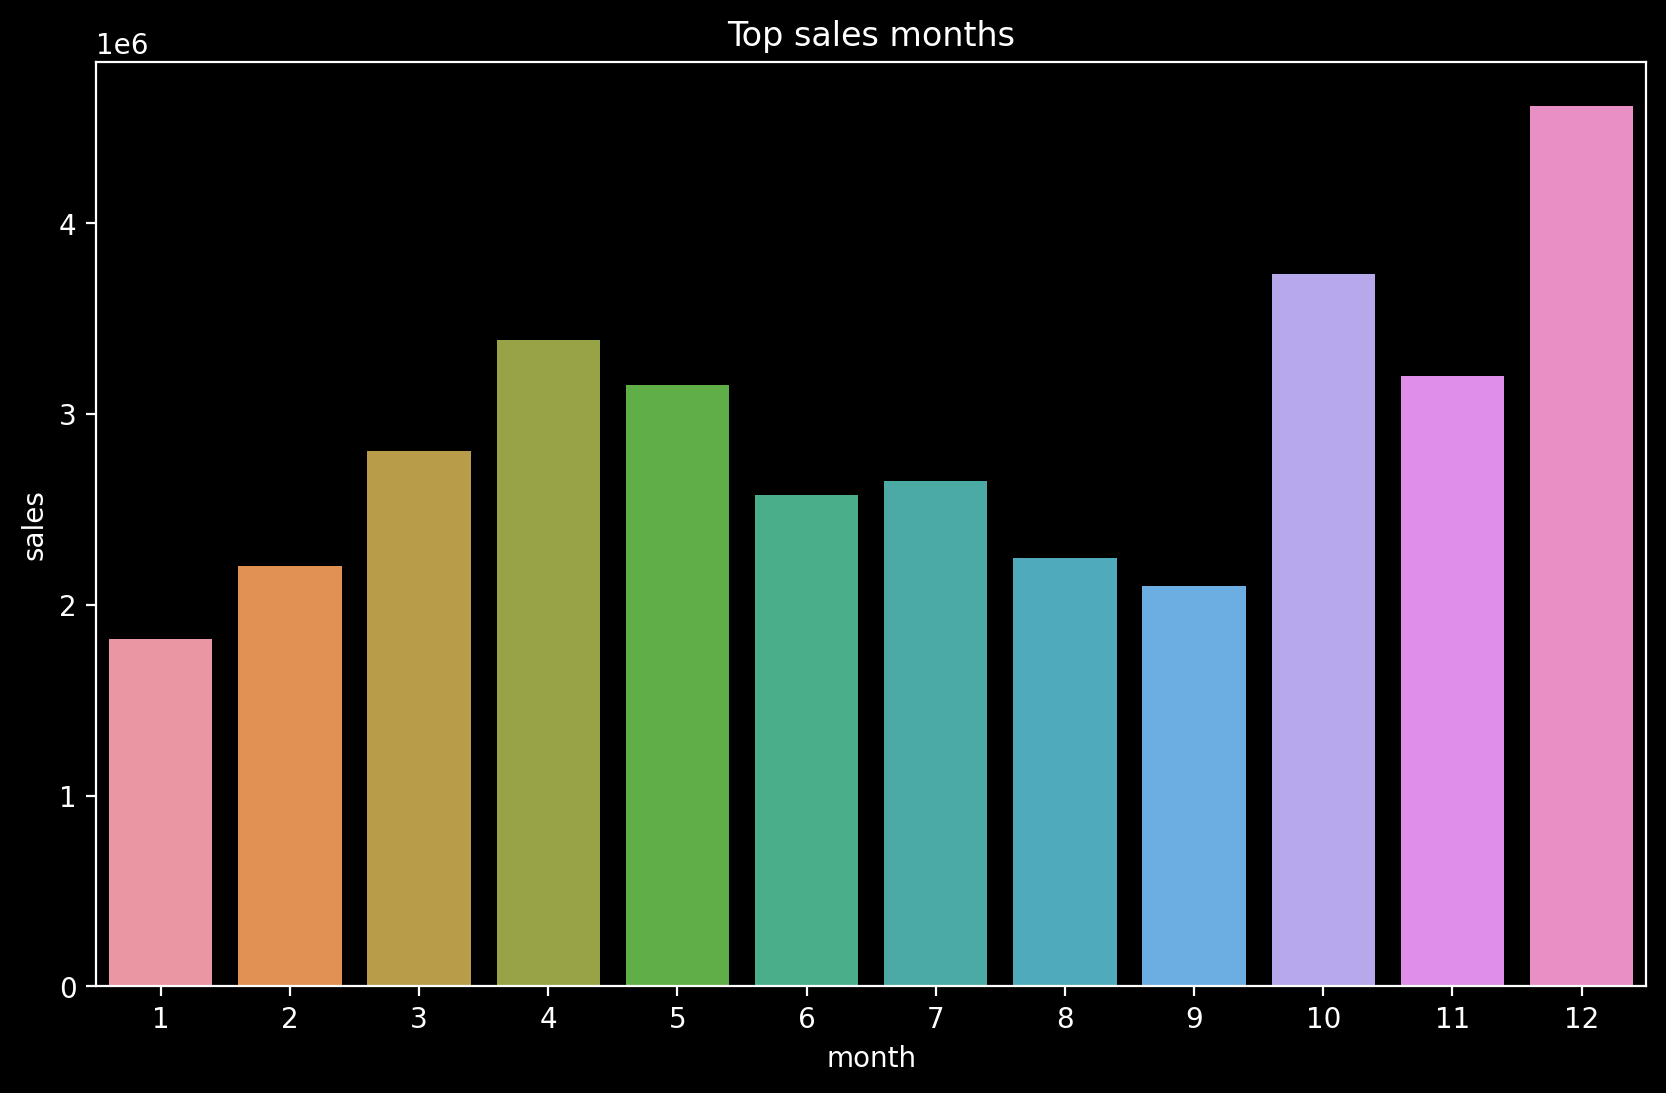

In [22]:
plt.figure(figsize=(10,6))
plt.xlabel('months')
plt.ylabel('Sales in USD ($)')
plt.title('Top sales months')
sns.barplot(data=top_month,x='month',y='sales');

In [23]:
###Question two what city had the highest number Of sales ?

In [24]:
#add city column
def get_city(address):
    return address.split(',')[1]
df['city'] = df['Purchase Address'].apply(get_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,236670,Wired Headphones,2,11.990000,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.980000,Seattle
1,236671,Bose SoundSport Headphones,1,99.989998,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.989998,Dallas
2,236672,iPhone,1,700.000000,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.000000,Portland
3,236673,AA Batteries (4-pack),2,3.840000,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.680000,Los Angeles
4,236674,AA Batteries (4-pack),2,3.840000,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.680000,New York City


In [25]:
df.groupby('city')['sales'].sum()

city
 Atlanta          2.795499e+06
 Austin           1.819582e+06
 Boston           3.661642e+06
 Dallas           2.767975e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Portland         2.320491e+06
 San Francisco    8.262204e+06
 Seattle          2.747755e+06
Name: sales, dtype: float64

In [26]:
df.groupby('city')['sales'].sum().sort_values(ascending=False)

city
 San Francisco    8.262204e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Boston           3.661642e+06
 Atlanta          2.795499e+06
 Dallas           2.767975e+06
 Seattle          2.747755e+06
 Portland         2.320491e+06
 Austin           1.819582e+06
Name: sales, dtype: float64

In [27]:
Highest_Cities = pd.DataFrame(df.groupby('city')['sales'].sum().sort_values(ascending=False).reset_index())
Highest_Cities

,city,sales
0,San Francisco,8.262204e+06
1,Los Angeles,5.452571e+06
2,New York City,4.664317e+06
3,Boston,3.661642e+06
4,Atlanta,2.795499e+06
5,Dallas,2.767975e+06
6,Seattle,2.747755e+06
7,Portland,2.320491e+06
8,Austin,1.819582e+06


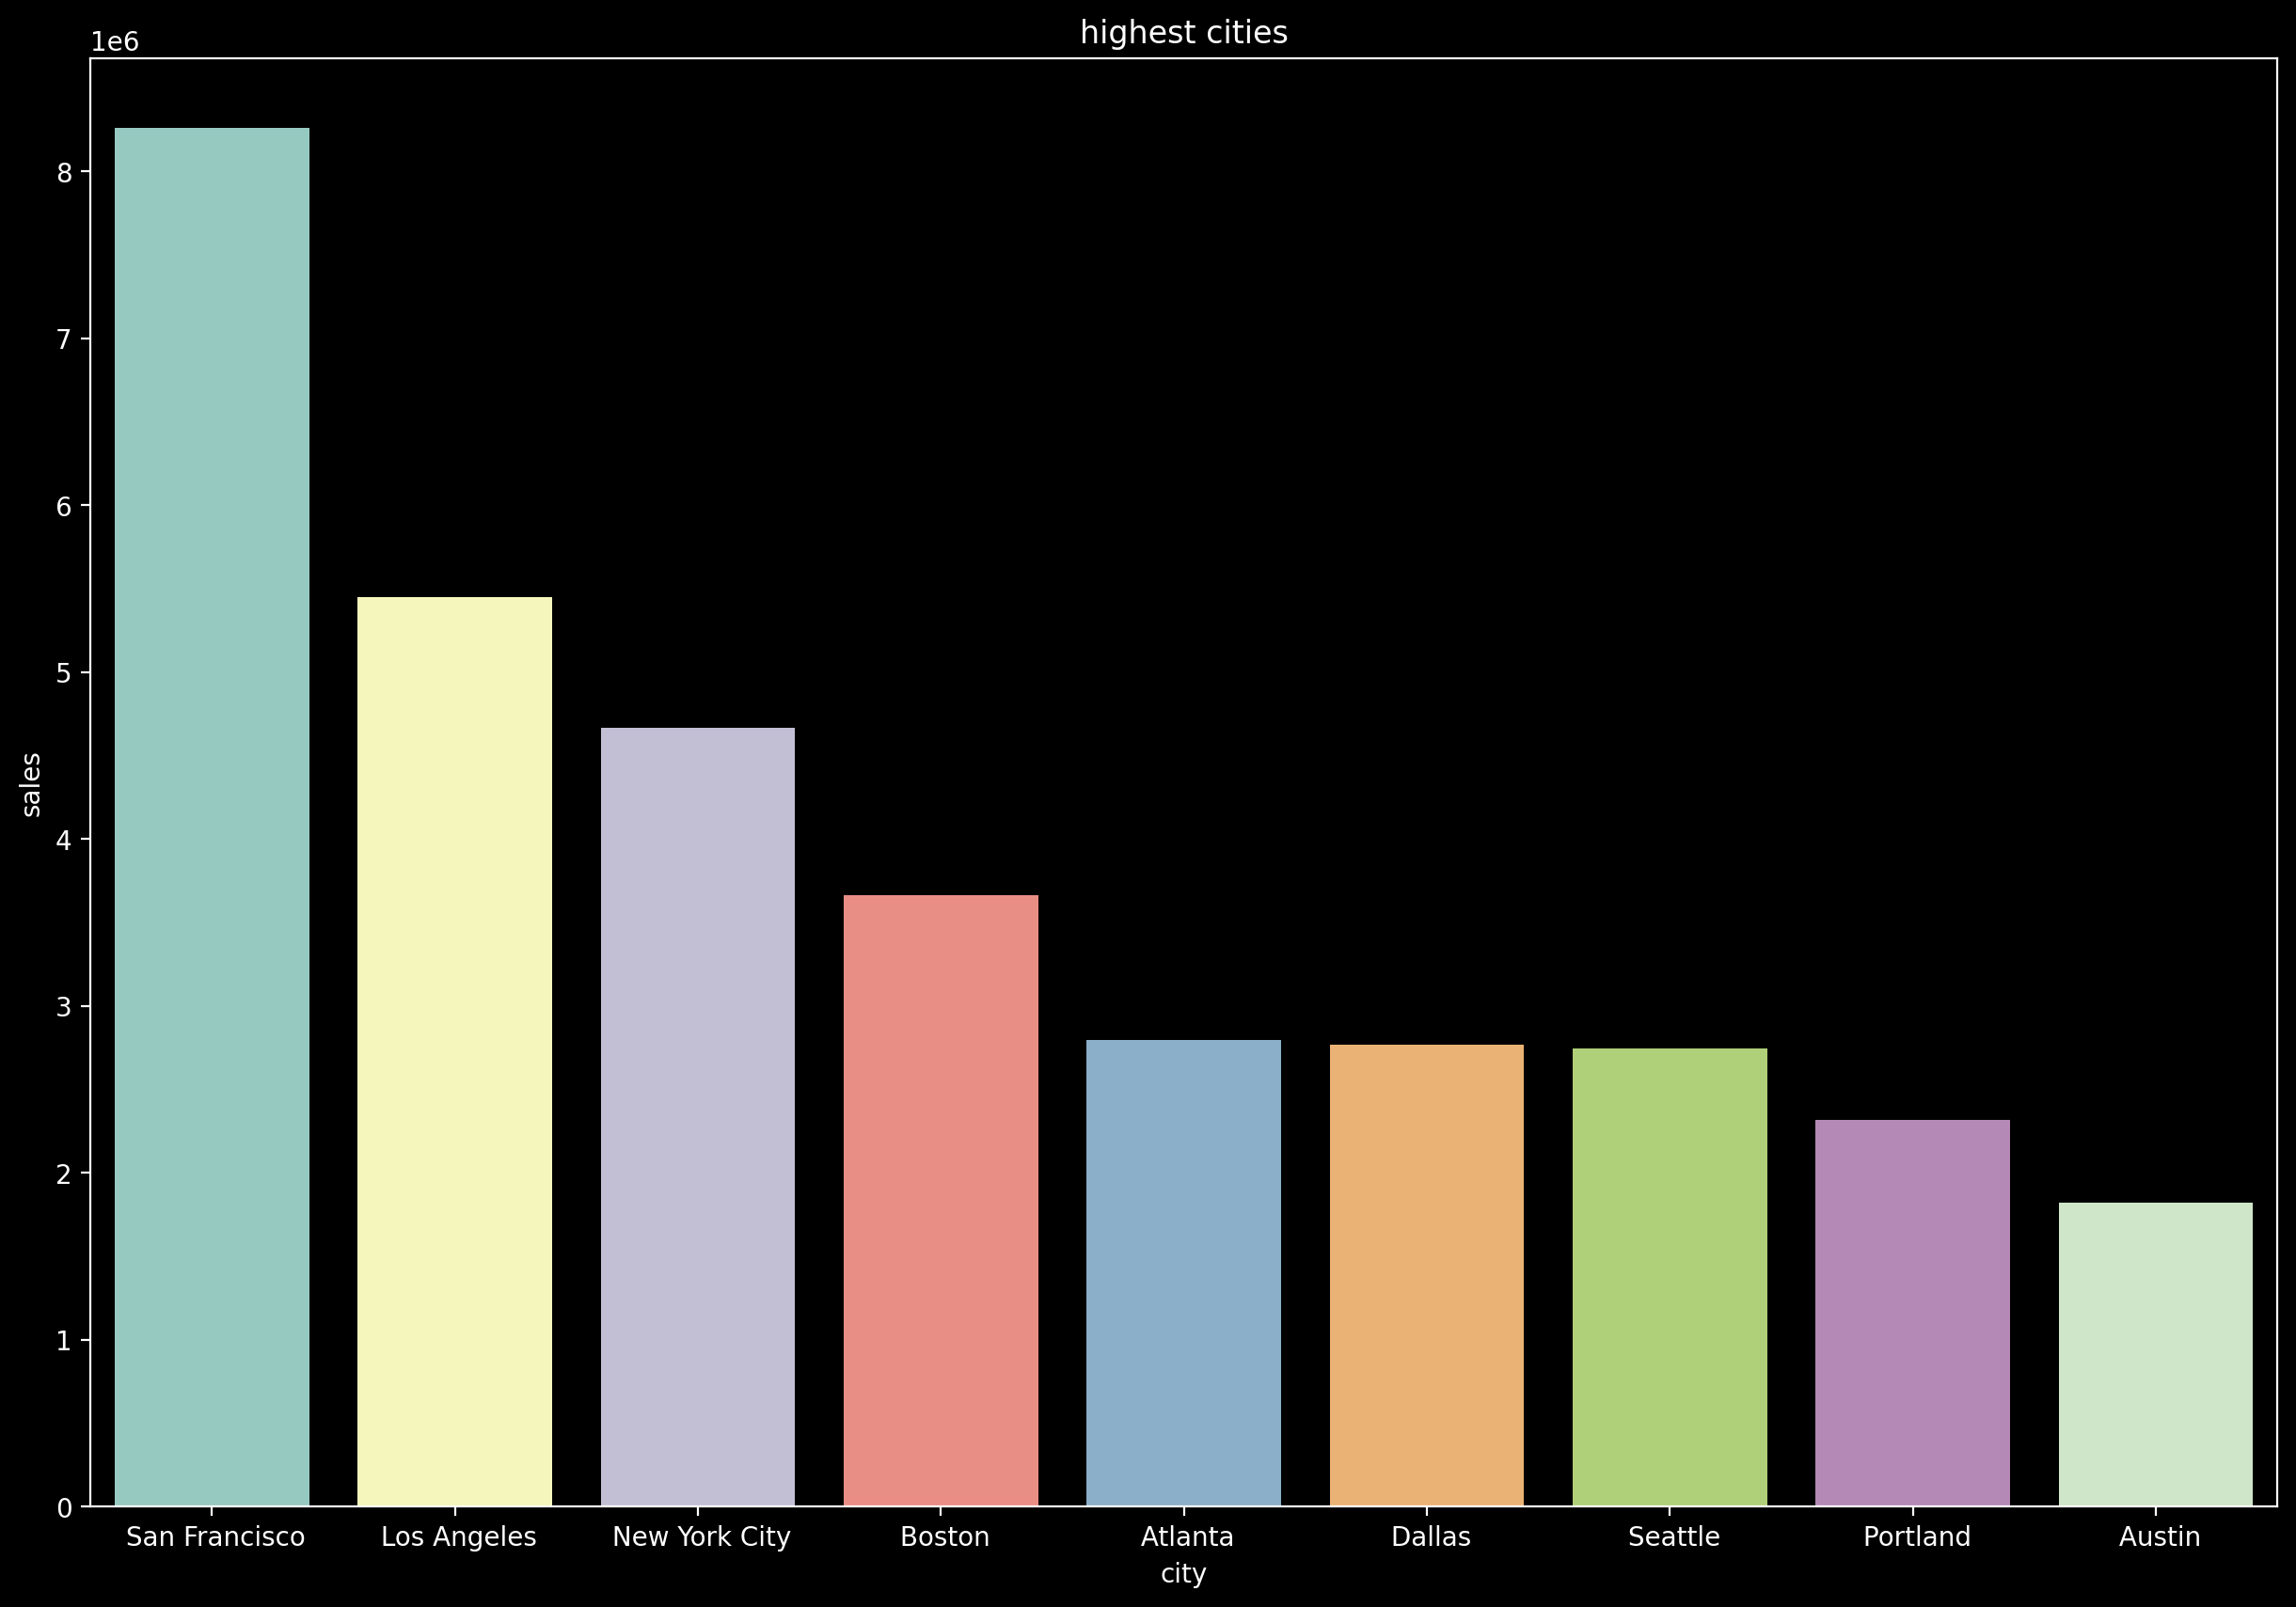

In [28]:
plt.figure(figsize=(15,10))
plt.xlabel('cities')
plt.ylabel('Sales in USD ($)')
plt.title('highest cities')
sns.barplot(data=Highest_Cities,x='city',y='sales');

In [29]:
#the percentage of cities
percentage_of_cities = pd.DataFrame(df['city'].value_counts(normalize=True)*100)
percentage_of_cities

,city
San Francisco,24.055929
Los Angeles,15.920946
New York City,13.377790
Boston,10.720086
Atlanta,8.002689
Dallas,7.969884
Seattle,7.922560
Portland,6.703415
Austin,5.326701


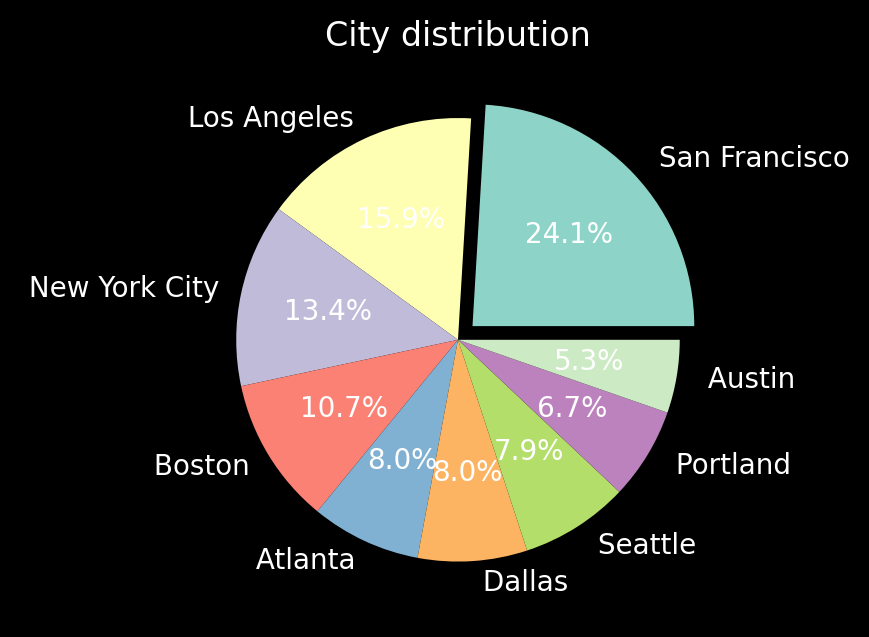

In [30]:
plt.pie(percentage_of_cities['city'],labels=percentage_of_cities.index, autopct='%1.1f%%',explode=[0.09,0,0,0,0,0,0,0,0])
plt.title('City distribution')
plt.show()

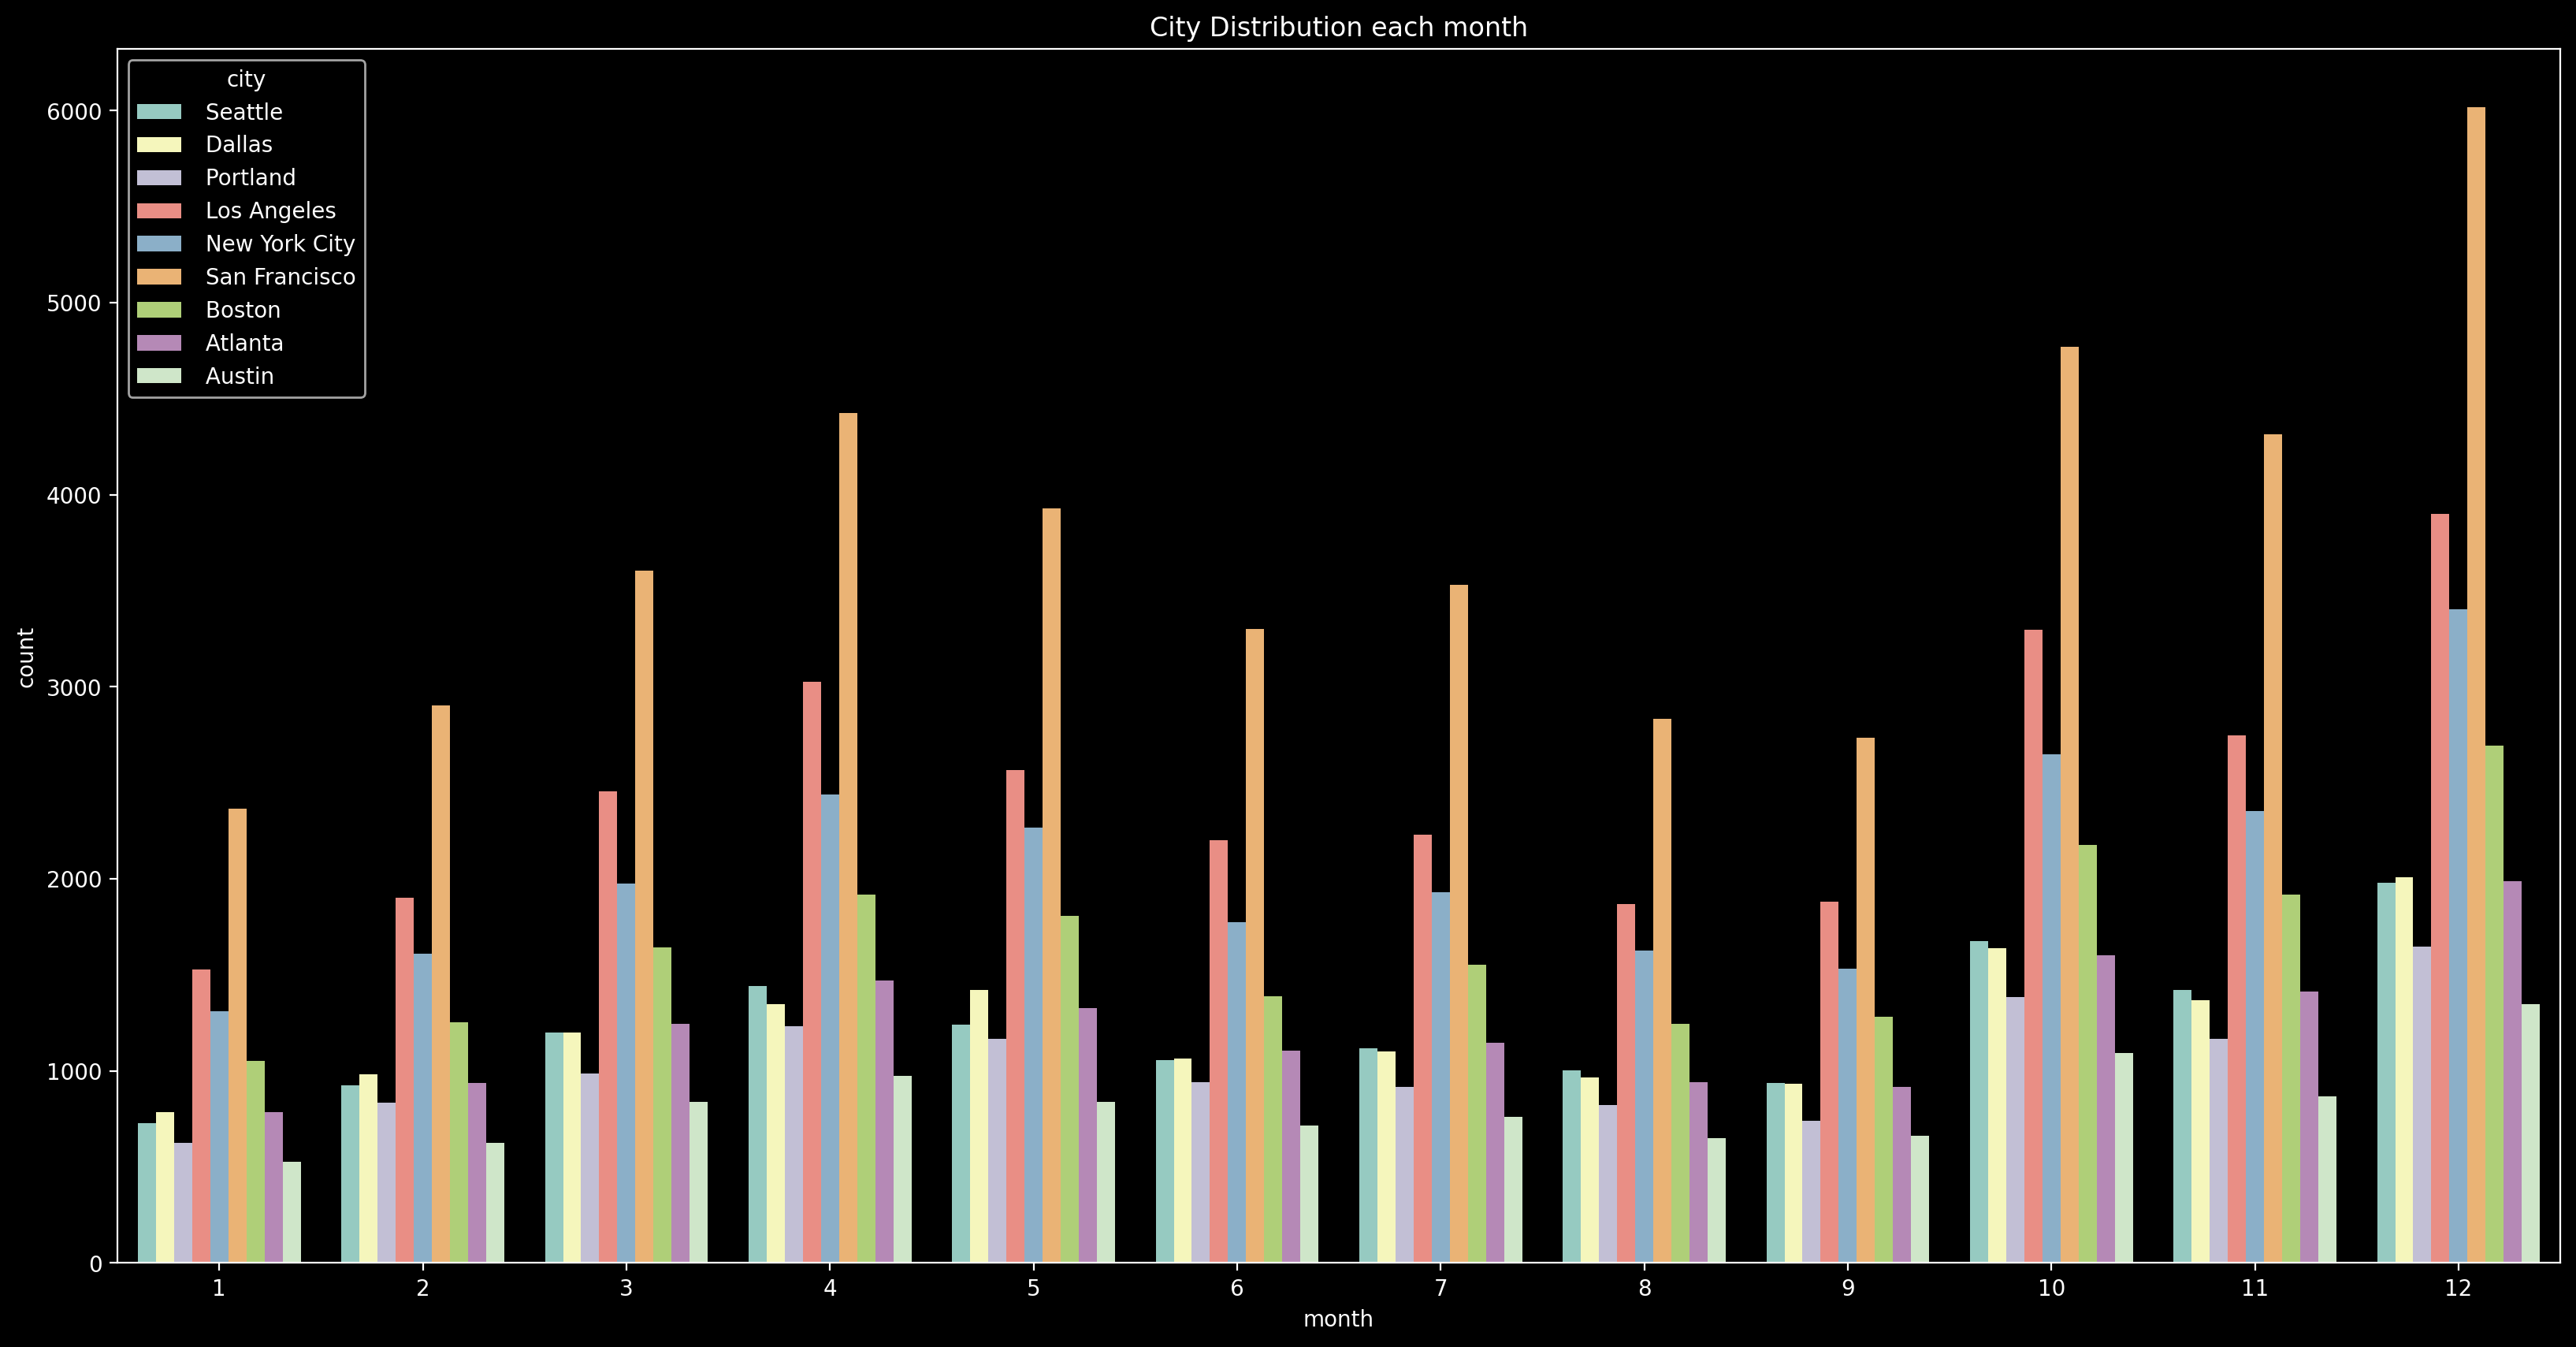

In [31]:
#city Distribution for each month
plt.figure(figsize=(20,10))
plt.title('City Distribution each month')
sns.countplot(x='month',hue='city',data=df);

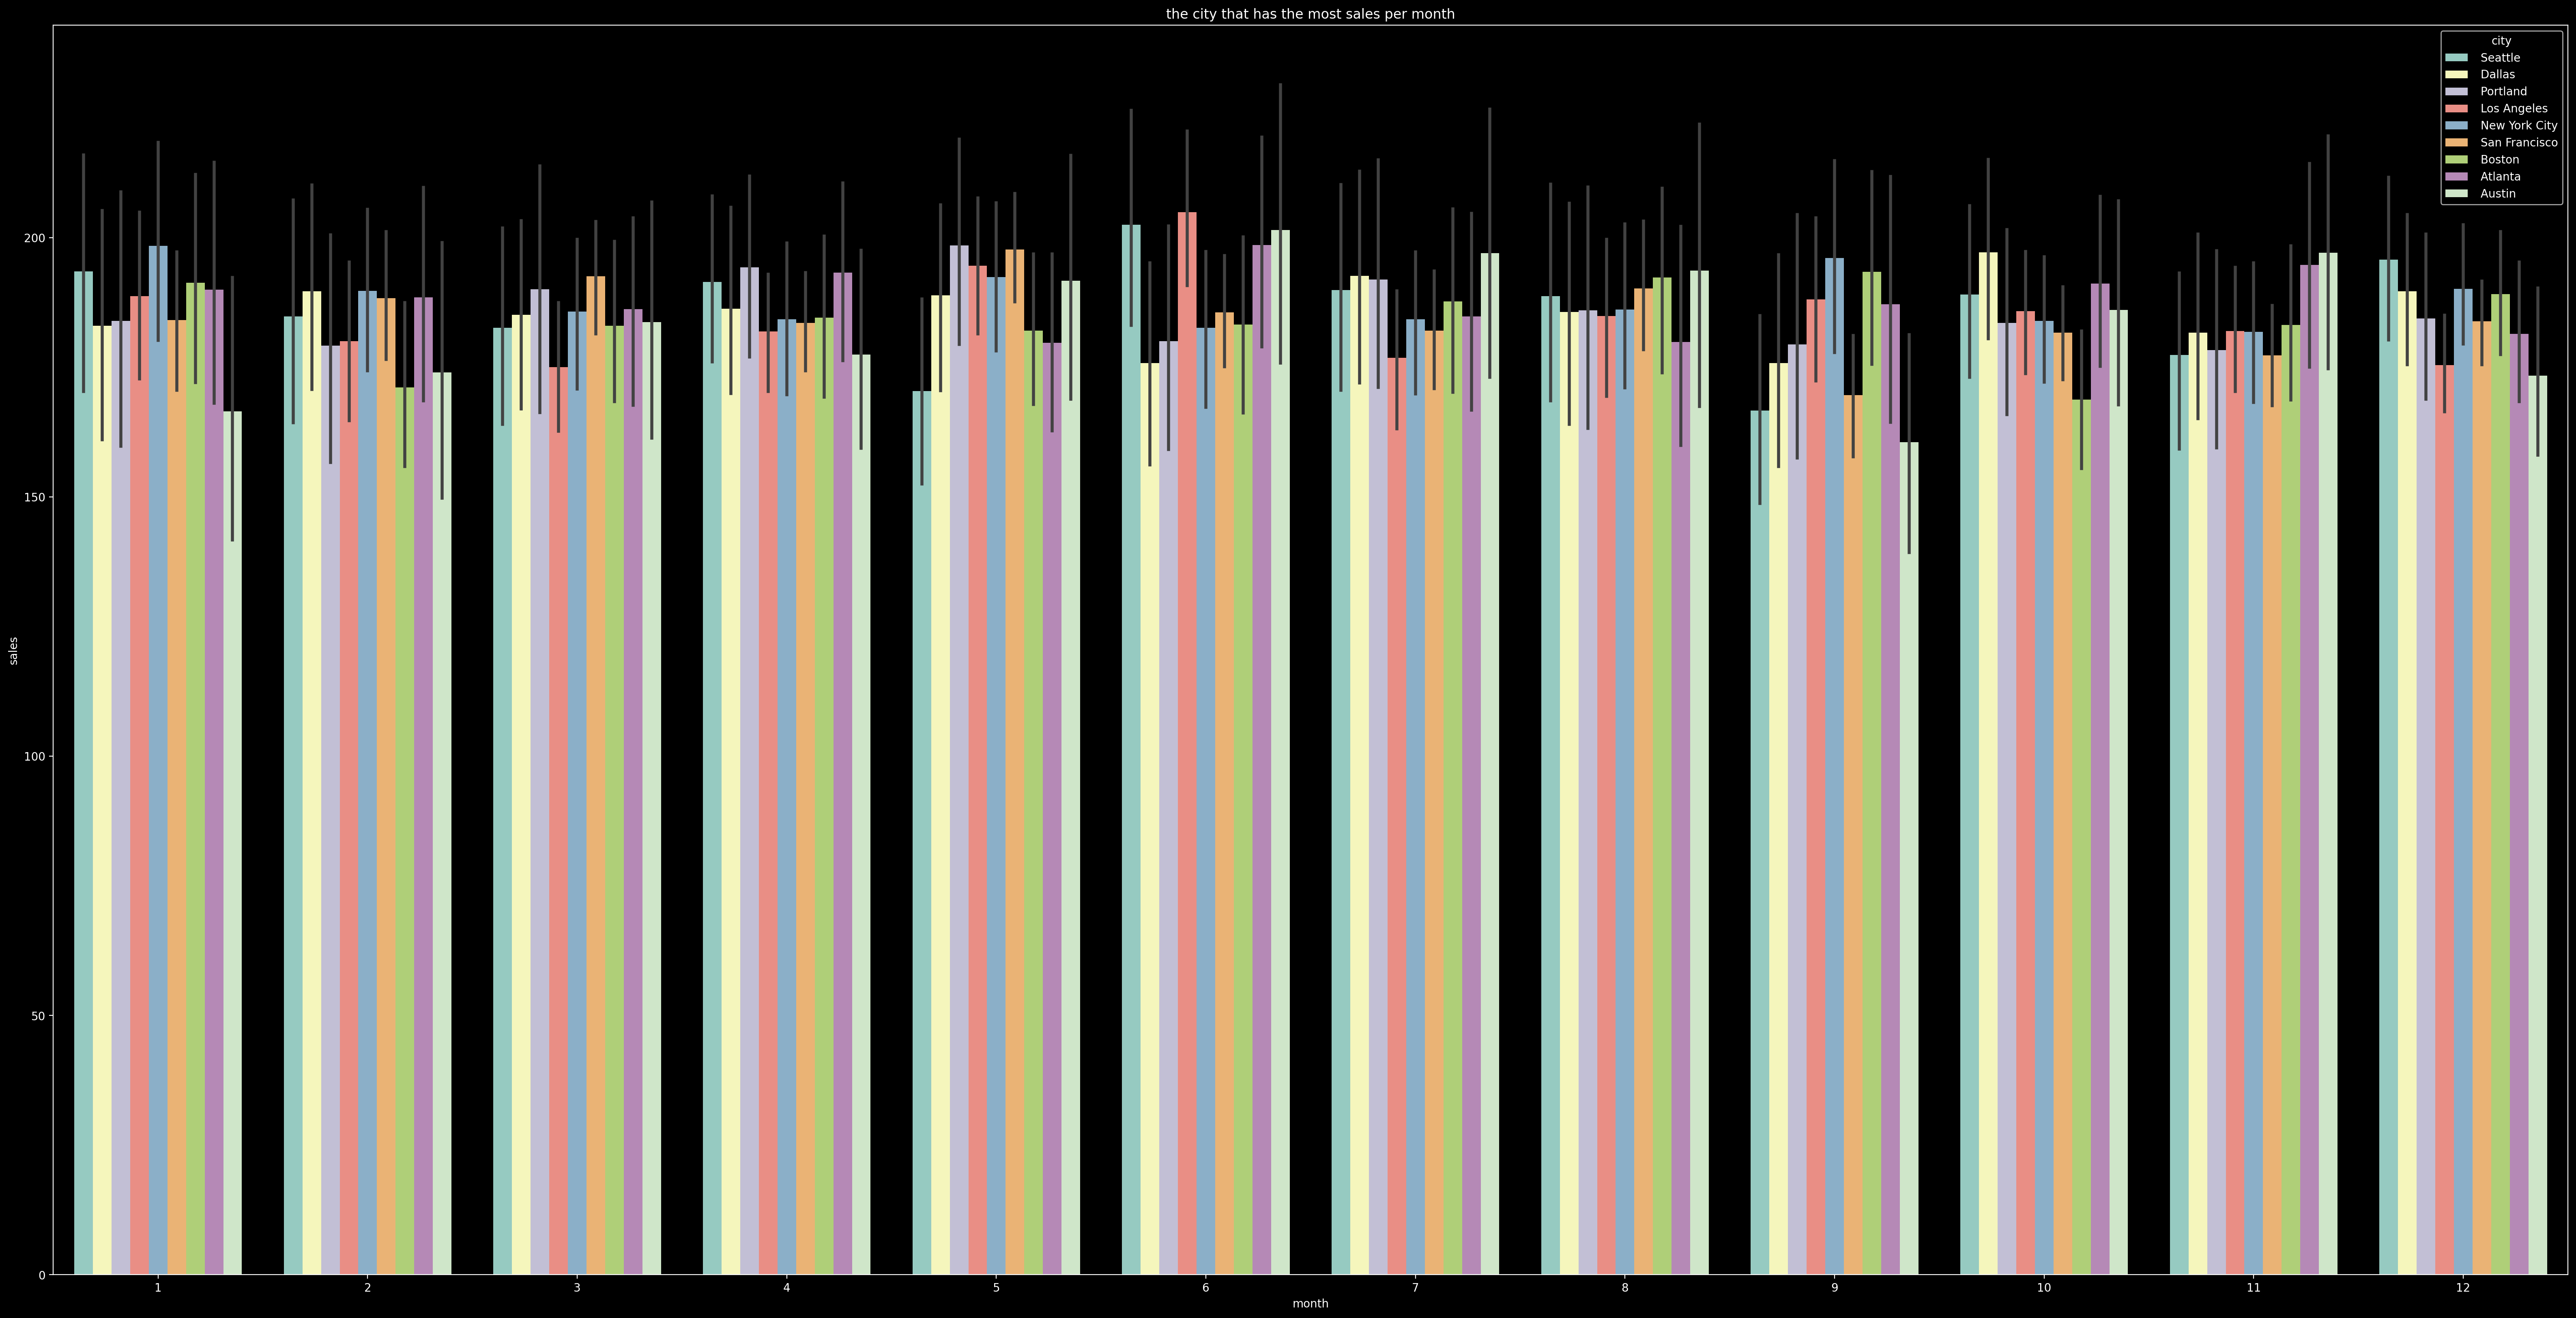

In [32]:
#What about the city that has the most sales per month ?
plt.figure(figsize=(40,20))
plt.xlabel('months and cities')
plt.ylabel('Sales in USD ($)')
plt.title('the city that has the most sales per month')
sns.barplot(data=df,x='month',y='sales',hue='city');

In [33]:
###what time should we display Advertisements to maximise likehood of customers buying product?

In [34]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,236670,Wired Headphones,2,11.990000,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.980000,Seattle
1,236671,Bose SoundSport Headphones,1,99.989998,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.989998,Dallas
2,236672,iPhone,1,700.000000,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.000000,Portland
3,236673,AA Batteries (4-pack),2,3.840000,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.680000,Los Angeles
4,236674,AA Batteries (4-pack),2,3.840000,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.680000,New York City


In [35]:
df['hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour
0,236670,Wired Headphones,2,11.990000,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.980000,Seattle,22
1,236671,Bose SoundSport Headphones,1,99.989998,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.989998,Dallas,15
2,236672,iPhone,1,700.000000,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.000000,Portland,14
3,236673,AA Batteries (4-pack),2,3.840000,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.680000,Los Angeles,20
4,236674,AA Batteries (4-pack),2,3.840000,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.680000,New York City,19


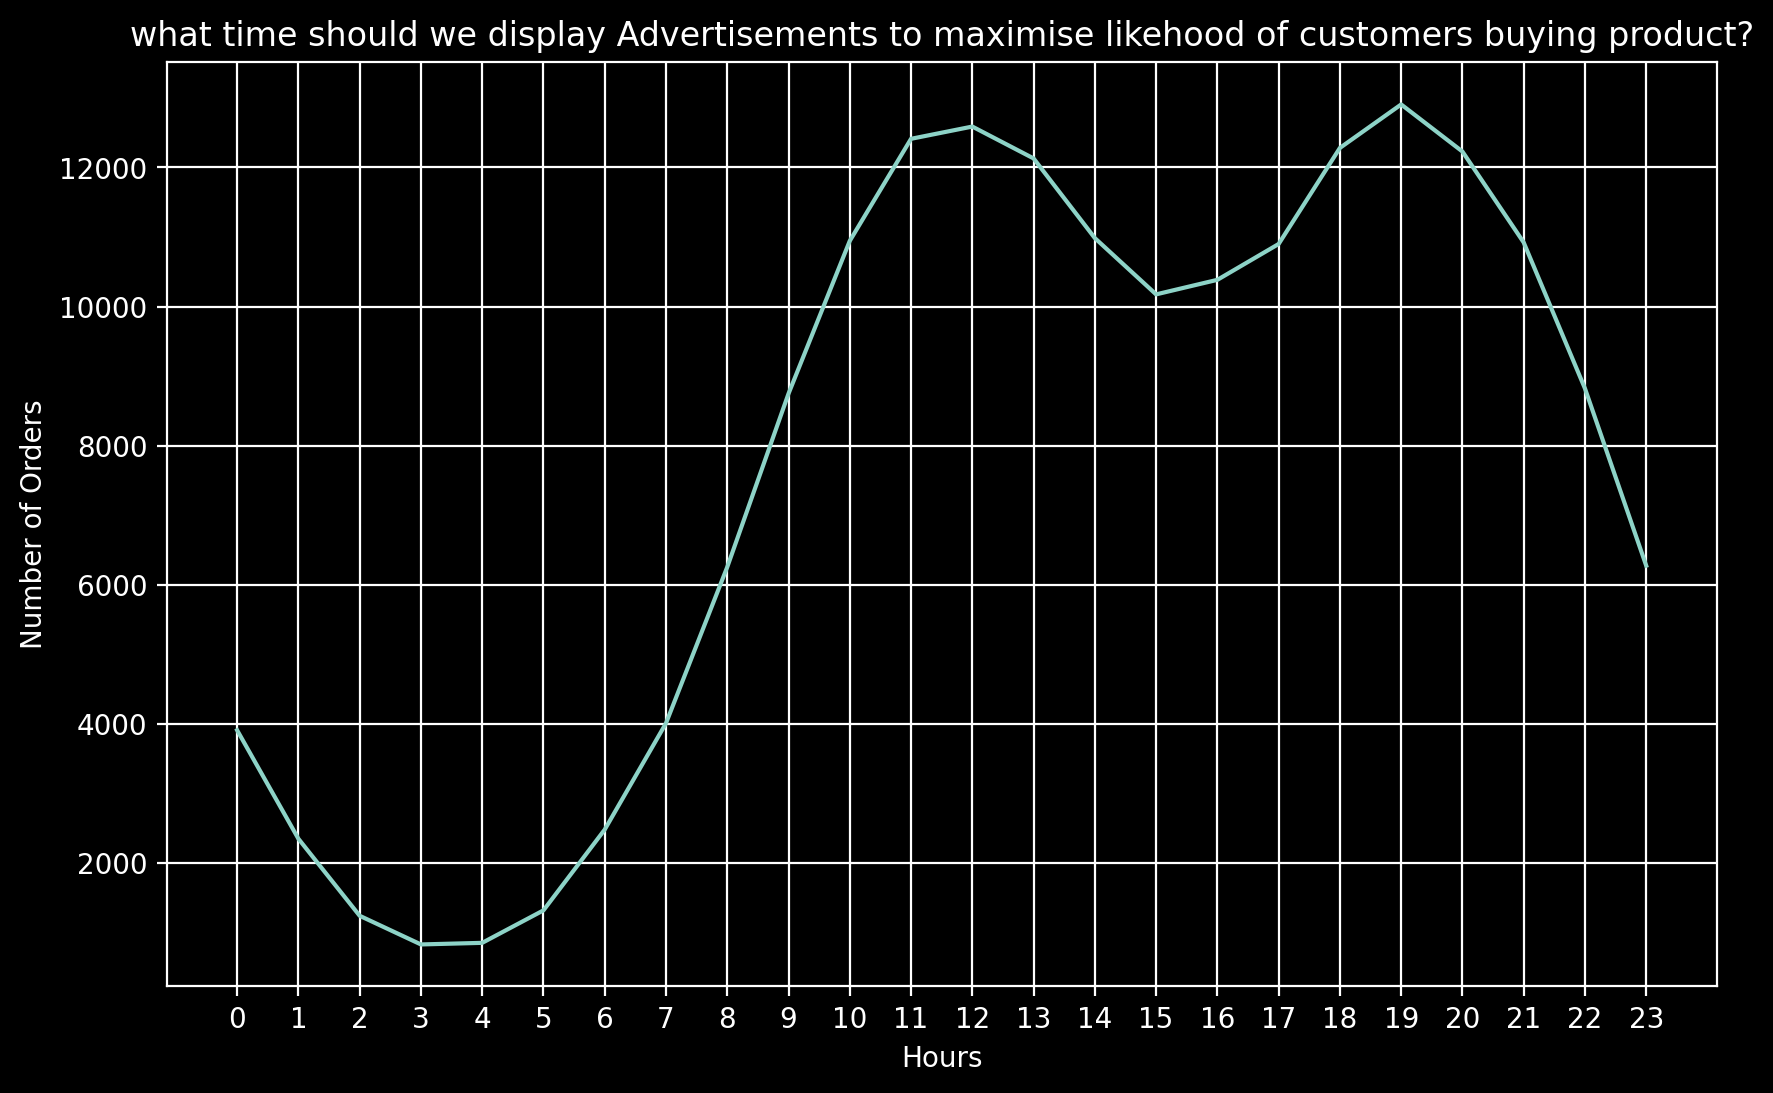

In [36]:
count = df['hour'].value_counts()
plt.figure(figsize=(10,6))
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.title('what time should we display Advertisements to maximise likehood of customers buying product?')
plt.xticks(count.index)
plt.grid()
sns.lineplot(x=count.index,y=count.values);
#my Recommendation is Between 10am (10) and 8pm (20)

In [37]:
###What products are sold most often?

In [38]:
most_often_products = pd.DataFrame(df['Product'].value_counts().reset_index())
most_often_products = most_often_products.rename(columns={'Product':'number of orders','index':'Product'})
most_often_products

,Product,number of orders
0,USB-C Charging Cable,21903
1,Lightning Charging Cable,21658
2,AAA Batteries (4-pack),20641
3,AA Batteries (4-pack),20577
4,Wired Headphones,18882
5,Apple Airpods Headphones,15549
6,Bose SoundSport Headphones,13325
7,27in FHD Monitor,7507
8,iPhone,6842
9,27in 4K Gaming Monitor,6230


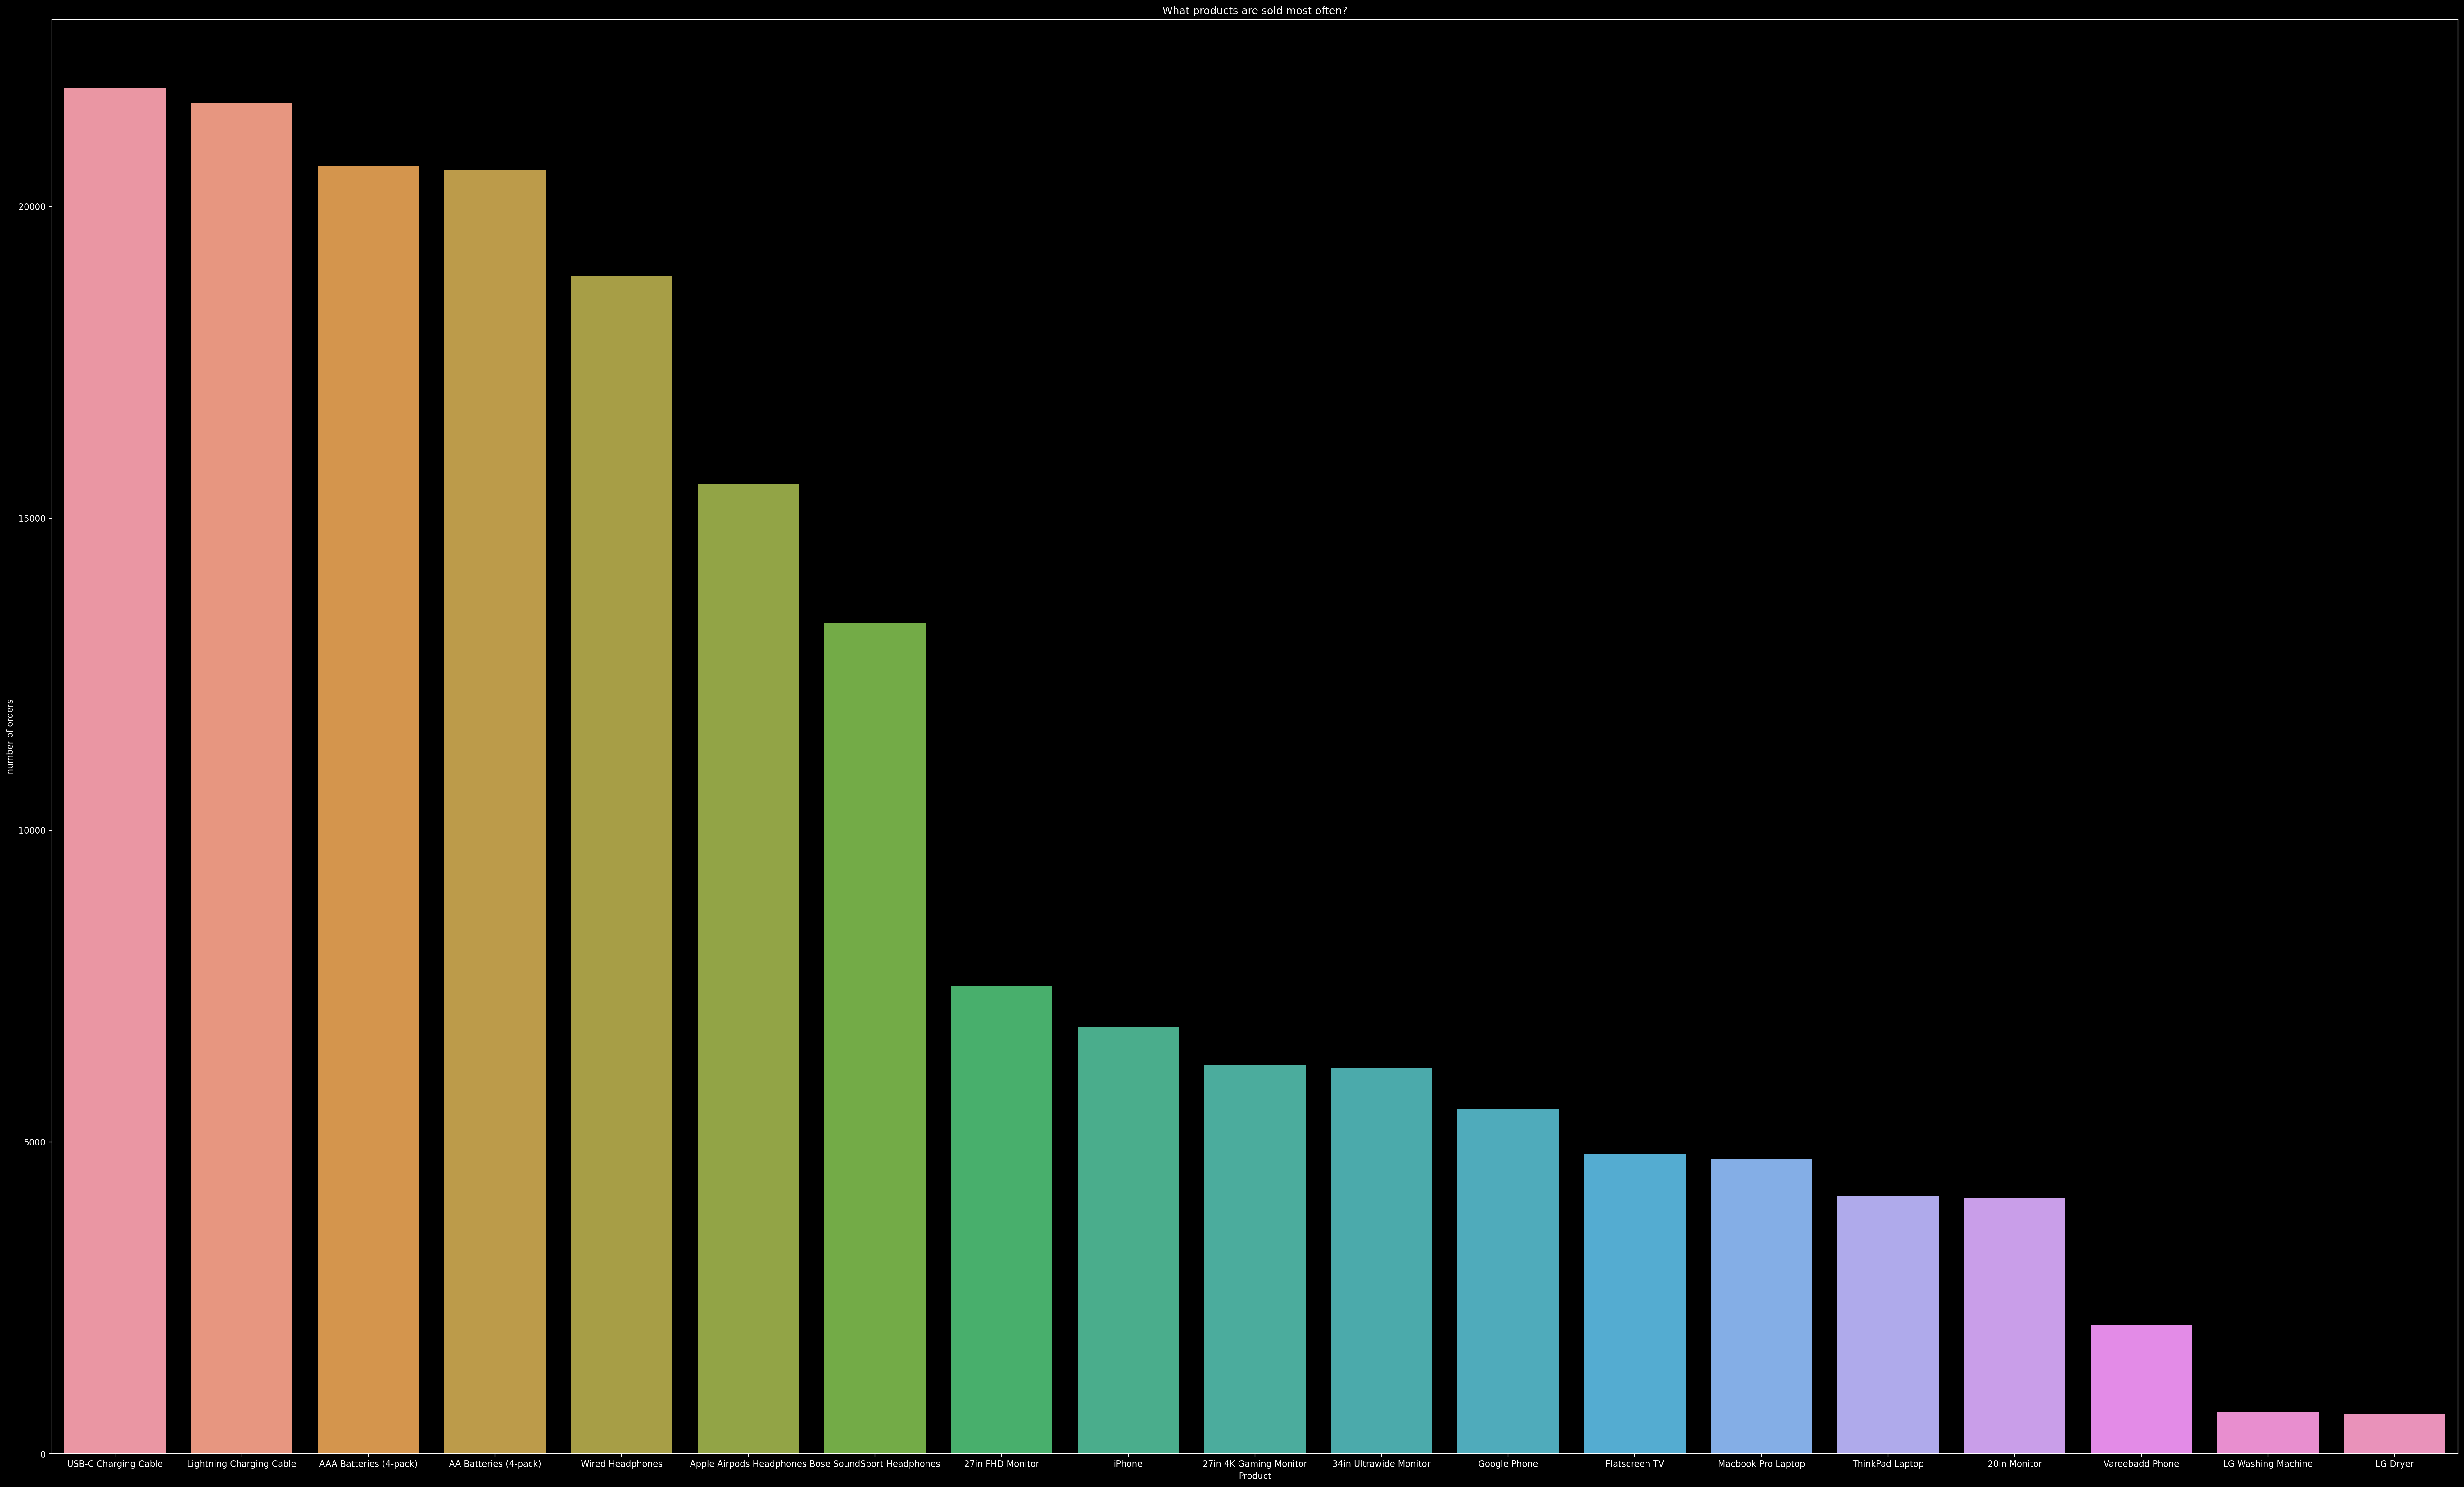

In [39]:
plt.figure(figsize=(50,30))
plt.title('What products are sold most often?')
sns.barplot(data=most_often_products,x='Product',y='number of orders');

In [40]:
###what products are most often sold together ?

In [41]:
condition = df['Order ID'].duplicated(keep=False)
duplicated_Orders = df[condition]
duplicated_Orders

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour
46,236716,AA Batteries (4-pack),2,3.840000,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,7.680000,San Francisco,20
47,236716,USB-C Charging Cable,1,11.950000,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,11.950000,San Francisco,20
60,236729,iPhone,1,700.000000,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,700.000000,San Francisco,9
61,236729,Apple Airpods Headphones,1,150.000000,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,150.000000,San Francisco,9
62,236730,Google Phone,1,600.000000,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",8,600.000000,New York City,10
...,...,...,...,...,...,...,...,...,...,...
186709,295526,27in FHD Monitor,1,149.990005,2019-11-21 11:26:00,"550 Park St, Dallas, TX 75001",11,149.990005,Dallas,11
186717,295534,Google Phone,1,600.000000,2019-11-06 19:21:00,"22 Pine St, Boston, MA 02215",11,600.000000,Boston,19
186718,295534,USB-C Charging Cable,1,11.950000,2019-11-06 19:21:00,"22 Pine St, Boston, MA 02215",11,11.950000,Boston,19
186783,295599,iPhone,1,700.000000,2019-11-25 21:17:00,"258 Ridge St, New York City, NY 10001",11,700.000000,New York City,21


In [42]:
duplicated_Orders['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
duplicated_Orders

<ipython-input-42-86ae22190497>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_Orders['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,Grouped
46,236716,AA Batteries (4-pack),2,3.840000,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,7.680000,San Francisco,20,"AA Batteries (4-pack),USB-C Charging Cable"
47,236716,USB-C Charging Cable,1,11.950000,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,11.950000,San Francisco,20,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,iPhone,1,700.000000,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,700.000000,San Francisco,9,"iPhone,Apple Airpods Headphones"
61,236729,Apple Airpods Headphones,1,150.000000,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,150.000000,San Francisco,9,"iPhone,Apple Airpods Headphones"
62,236730,Google Phone,1,600.000000,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",8,600.000000,New York City,10,"Google Phone,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
186709,295526,27in FHD Monitor,1,149.990005,2019-11-21 11:26:00,"550 Park St, Dallas, TX 75001",11,149.990005,Dallas,11,"Apple Airpods Headphones,27in FHD Monitor"
186717,295534,Google Phone,1,600.000000,2019-11-06 19:21:00,"22 Pine St, Boston, MA 02215",11,600.000000,Boston,19,"Google Phone,USB-C Charging Cable"
186718,295534,USB-C Charging Cable,1,11.950000,2019-11-06 19:21:00,"22 Pine St, Boston, MA 02215",11,11.950000,Boston,19,"Google Phone,USB-C Charging Cable"
186783,295599,iPhone,1,700.000000,2019-11-25 21:17:00,"258 Ridge St, New York City, NY 10001",11,700.000000,New York City,21,"iPhone,Apple Airpods Headphones"


In [43]:
condition = duplicated_Orders[['Order ID','Grouped']].drop_duplicates()
duplicated_Orders = condition
duplicated_Orders

,Order ID,Grouped
46,236716,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,"iPhone,Apple Airpods Headphones"
62,236730,"Google Phone,Wired Headphones"
132,236799,"Google Phone,Wired Headphones"
163,236829,"Vareebadd Phone,USB-C Charging Cable"
...,...,...
186667,295487,"Apple Airpods Headphones,Macbook Pro Laptop"
186694,295513,"iPhone,Lightning Charging Cable"
186708,295526,"Apple Airpods Headphones,27in FHD Monitor"
186717,295534,"Google Phone,USB-C Charging Cable"


In [44]:
Grouped = pd.DataFrame(duplicated_Orders['Grouped'].value_counts().reset_index())
Grouped = Grouped.rename(columns={'index':'Products','Grouped':'number of orders'})
Grouped

,Products,number of orders
0,"iPhone,Lightning Charging Cable",882
1,"Google Phone,USB-C Charging Cable",856
2,"iPhone,Wired Headphones",361
3,"Vareebadd Phone,USB-C Charging Cable",312
4,"Google Phone,Wired Headphones",303
...,...,...
361,"iPhone,Lightning Charging Cable,Flatscreen TV",1
362,"Vareebadd Phone,Bose SoundSport Headphones,Fla...",1
363,"Google Phone,Bose SoundSport Headphones,Lightn...",1
364,"iPhone,LG Washing Machine",1


In [45]:
#top 10
Grouped = Grouped.head(10)
Grouped

,Products,number of orders
0,"iPhone,Lightning Charging Cable",882
1,"Google Phone,USB-C Charging Cable",856
2,"iPhone,Wired Headphones",361
3,"Vareebadd Phone,USB-C Charging Cable",312
4,"Google Phone,Wired Headphones",303
5,"iPhone,Apple Airpods Headphones",286
6,"Google Phone,Bose SoundSport Headphones",161
7,"Vareebadd Phone,Wired Headphones",104
8,"Google Phone,USB-C Charging Cable,Wired Headph...",77
9,"Vareebadd Phone,Bose SoundSport Headphones",60


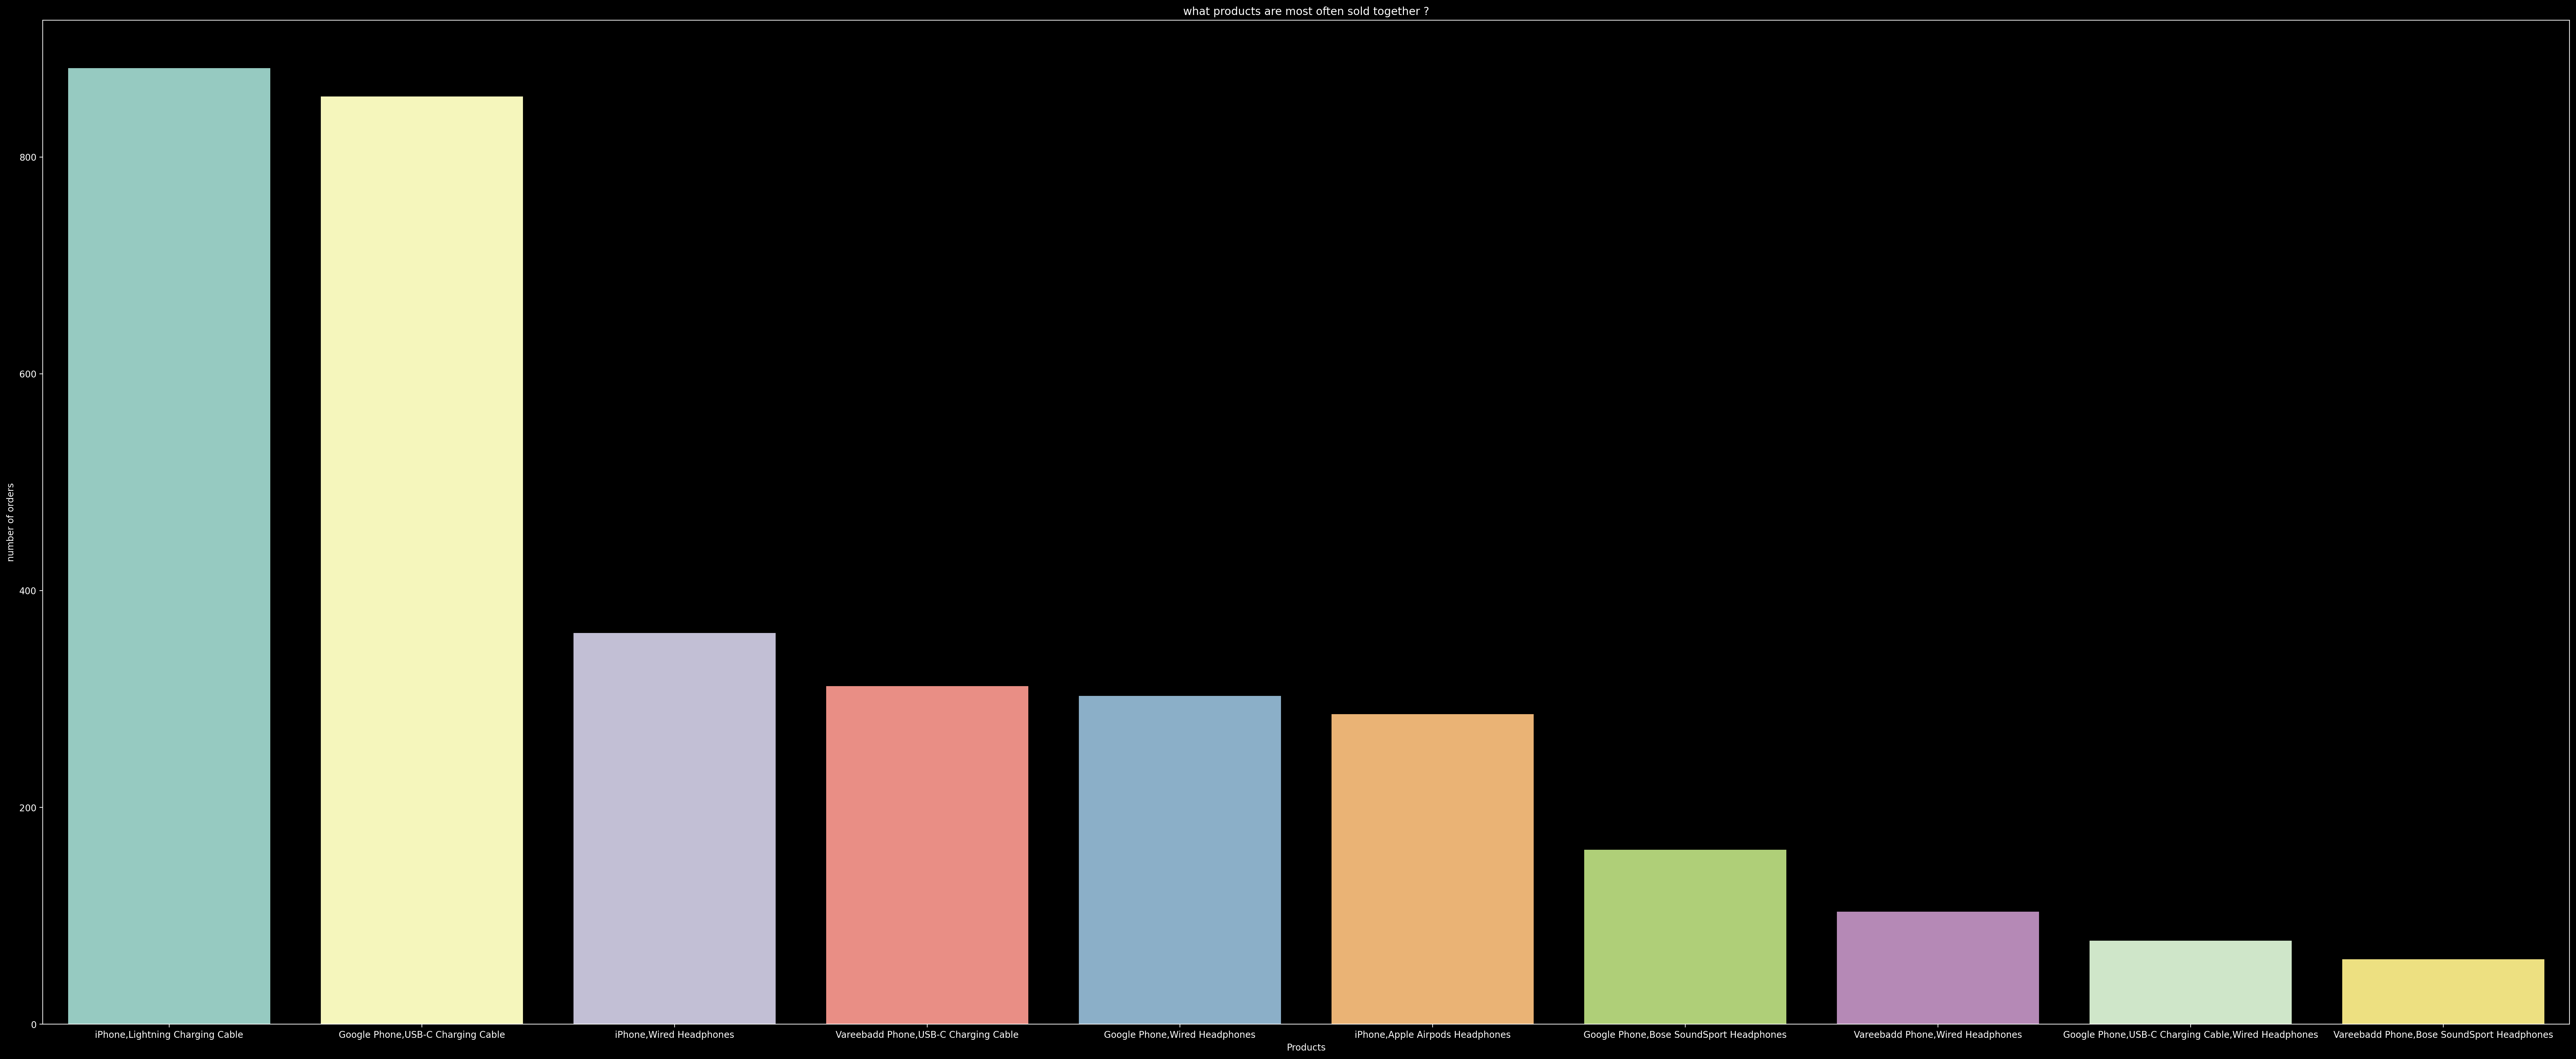

In [46]:
plt.figure(figsize=(50,20))
plt.title('what products are most often sold together ?')
sns.barplot(data=Grouped,x='Products',y='number of orders');

In [47]:
#The average Price for each product
prices = df.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.990021
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.990021
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32